In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.integrate import quad

In [2]:
def halfCircle(x,r):
    return np.sqrt(r**2 - x**2)

unityRadius = 1/np.sqrt(np.pi)

In [3]:
#do estimation of fraction
totalBins = 96
usedBins = 40
start = -1*(usedBins)/totalBins*unityRadius
end = 1*(usedBins)/totalBins*unityRadius

##### Area Estimation
usedArea = quad(halfCircle, start, end, args=(unityRadius,))
realCircleArea = usedArea[0]*2
print("Fraction of total Area used: " + str(realCircleArea))

In [4]:
#Coincidence probability estimation
coincidenceRate = realCircleArea * realCircleArea
print("Fraction of used Coincidences: " + str(coincidenceRate))

NameError: name 'realCircleArea' is not defined

<IPython.core.display.Javascript object>


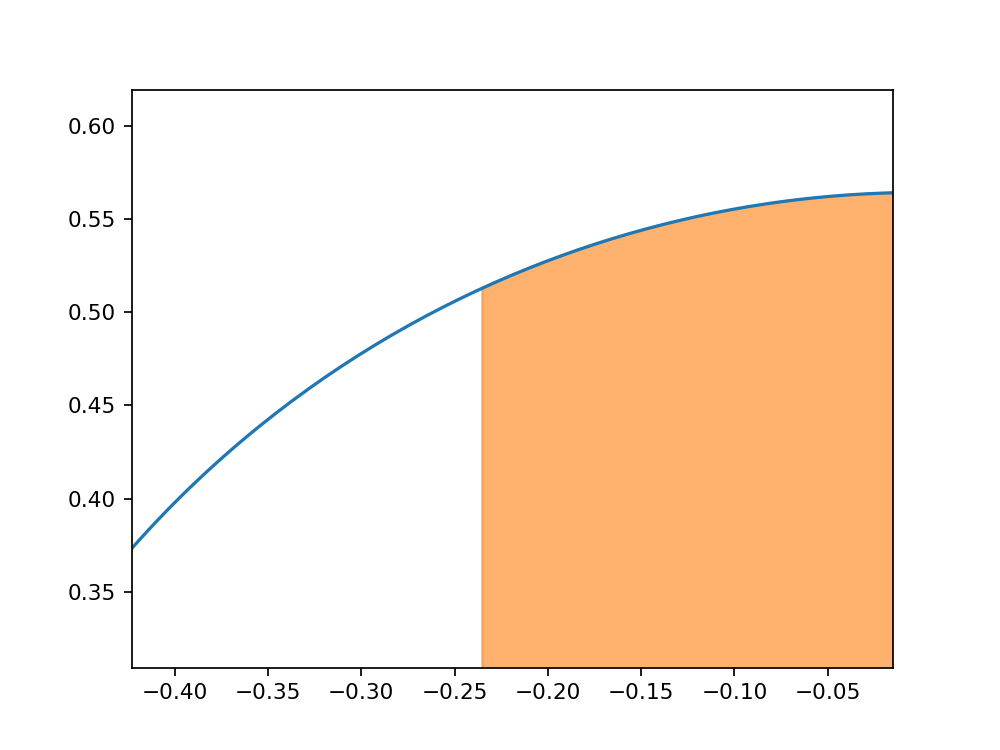

In [5]:
#Visualization
xes = np.linspace(-1*unityRadius, unityRadius, num=250)
xesRange = np.linspace(start, end, num=200)
yes = halfCircle(xes, unityRadius)
yesRange = halfCircle(xesRange, unityRadius)
plt.figure()
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
plt.plot(xes, yes, color="tab:blue")
plt.plot(xes, -1*yes, color="tab:blue")
plt.fill_between(xesRange, yesRange, -1*yesRange, color="tab:orange", alpha=0.6)
plt.xlim(-1.2*unityRadius, 1.2*unityRadius)
plt.show()

<IPython.core.display.Javascript object>


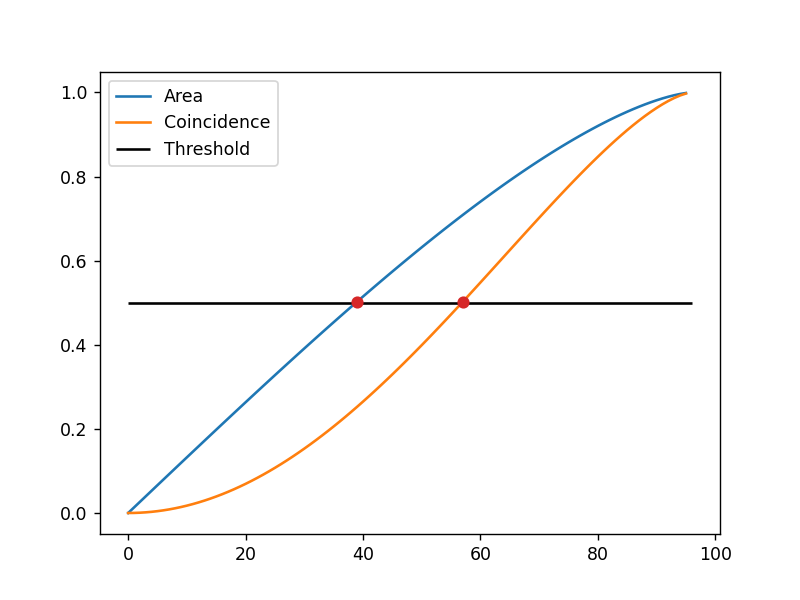

Threshold bin for area: [40]
Threshold bin for coincidence: [58]


In [64]:
#Automatic runtime for estimations
#init TotalBins and unity Radius
totalBins = 96
unityRadius = 1/np.sqrt(np.pi)
Threshold = 0.5
#initiate buffer arrays
bins = []
area = []
coincidences = []
#Loop over all bins
for i in range(96):
    usedBins = 15
    start = -1*(i)/totalBins*unityRadius
    end = 1*(i)/totalBins*unityRadius
    usedArea = quad(halfCircle, start, end, args=(unityRadius,))
    realCircleArea = usedArea[0]*2
    coincidenceCounts = realCircleArea**2
    bins.append(i)
    area.append(realCircleArea)
    coincidences.append(coincidenceCounts)
    
#intersection Stuff
bins = np.array(bins)
coincidences = np.array(coincidences)
area = np.array(area)

thresholdVals = Threshold * np.ones_like(bins)

idxArea = np.argwhere(np.diff(np.sign(area - thresholdVals))).flatten()
idxCoincidence = np.argwhere(np.diff(np.sign(coincidences - thresholdVals))).flatten()
    
#plot this stuff
plt.figure()
plt.plot(bins, area, label="Area", color="tab:blue")
plt.plot(bins, coincidences, label="Coincidence", color="tab:orange")
plt.hlines(Threshold, 0, 96, label="Threshold")

plt.plot(bins[idxArea+1], area[idxArea+1], "o", color="tab:red")
plt.plot(bins[idxCoincidence+1], coincidences[idxCoincidence+1], "o", color="tab:red")

plt.legend(loc="best")
plt.show()

print("Threshold bin for area: " + str(bins[idxArea+1]+1))
print("Threshold bin for coincidence: " + str(bins[idxCoincidence+1]+1))

In [68]:
#scratchpad
relative = 40/15
relativeError = 2.862965563152965/1.77
print(np.sqrt(relative))
print(relativeError)

1.632993161855452
1.617494668448003
